In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("A:/Jetbrains/Pycharm/Capstone/Datasets/diabetes.csv")
data = data.rename(columns={
    'BloodPressure': 'BP',
    'Glucose': 'Sugar',
    'Outcome': 'Condition'
})

In [22]:
data['Condition'] = data['Condition'].map({0: "Normal", 1: "Diabetic"})

In [23]:
X = data[['BP', 'Sugar', 'BMI', 'Age']]
y = data['Condition']


In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


Naive Bayes Accuracy: 0.73
Decision Tree Accuracy: 0.71
Random Forest Accuracy: 0.75
SVM Accuracy: 0.76
KNN Accuracy: 0.72


<BarContainer object of 5 artists>

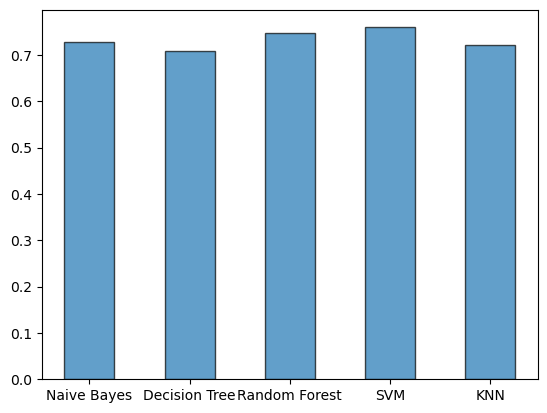

In [27]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

plt.bar(accuracies.keys(), accuracies.values(), edgecolor='black',width=0.5, alpha=0.7)


In [28]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_health_model.pkl")
print(f"Best model ({best_model_name}) saved.")


Best model (SVM) saved.


In [29]:
best_model = joblib.load("best_health_model.pkl")

In [30]:
user_input = {
    "BP": 140, "Sugar": 110, "Age": 50, "BMI": 28
}


In [31]:
user_features = np.array([user_input['BP'], user_input['Sugar'], 
                        user_input['Age'], user_input['BMI']]).reshape(1, -1)


In [32]:
user_features = scaler.transform(user_features)

C:\Users\aadip\anaconda3\envs\Capstone\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
risk_zone = best_model.predict(user_features)
categories = {0: "Normal", 1: "Pre-Diabetic", 2: "Diabetic"}
print(f"\nPredicted Risk Zone: {categories[0]}")


Predicted Risk Zone: Normal


In [34]:
thresholds = {
    "Normal": {"BP": 120, "Sugar": 100, "HeartRate": 70},
    "Pre-Diabetic": {"BP": 130, "Sugar": 110, "HeartRate": 80},
    "Diabetic": {"BP": 140, "Sugar": 126, "HeartRate": 90}
}


In [35]:
def compare_with_thresholds(user_input, thresholds):
    for condition, limits in thresholds.items():
        within_limits = all(user_input[param] <= limit for param, limit in limits.items() if param in user_input)
        if within_limits:
            return condition
    return "Above All Limits"


In [36]:
feedback = compare_with_thresholds(user_input, thresholds)
print(f"Threshold-Based Condition: {feedback}")

Threshold-Based Condition: Diabetic


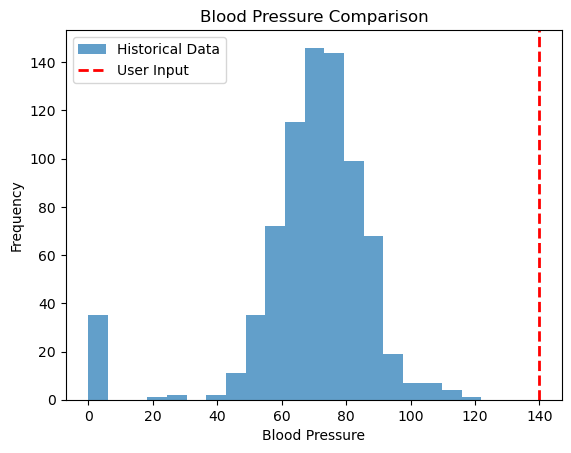

In [37]:
plt.hist(data['BP'], bins=20, alpha=0.7, label='Historical Data')
plt.axvline(user_input['BP'], color='red', linestyle='dashed', linewidth=2, label="User Input")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.title("Blood Pressure Comparison")
plt.legend()
plt.show()
